# Verzeo Major Project : XYZ is a service providing company that provides customers with a one year subscription plan for their product. The company wants to know whether the customers will renew the subscription for the coming year or not.****

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

%matplotlib inline
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(20, 14)})

## Load data ##

In [2]:
cust_case = pd.read_csv('../input/dspp1/customer_cases.csv')
cust_info = pd.read_csv('../input/dspp1/customer_info.csv')
cust_prod = pd.read_csv('../input/dspp1/customer_product.csv')
prod_info = pd.read_csv('../input/dspp1/product_info.csv')

## Clean Data ##

In [3]:
cust_case.head()

,Unnamed: 0,case_id,date_time,customer_id,channel,reason
0,1,CC101,2017-01-01 10:32:03,C2448,phone,signup
1,2,CC102,2017-01-01 11:35:47,C2449,phone,signup
2,3,CC103,2017-01-01 11:37:09,C2450,phone,signup
3,4,CC104,2017-01-01 13:28:14,C2451,phone,signup
4,5,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [4]:
# Drop the index column
cust_case = cust_case.drop(columns='Unnamed: 0')

In [5]:
# Check for duplicated rows
cust_case[cust_case.duplicated(['date_time', 'customer_id'], keep=False)]

,case_id,date_time,customer_id,channel,reason


In [6]:
cust_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330512 entries, 0 to 330511
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   case_id      330512 non-null  object
 1   date_time    330512 non-null  object
 2   customer_id  330512 non-null  object
 3   channel      330512 non-null  object
 4   reason       330512 non-null  object
dtypes: object(5)
memory usage: 12.6+ MB


In [7]:
cust_case['date'] = cust_case['date_time'].astype('datetime64').dt.date.astype('datetime64')
cust_case.drop(columns=['date_time'], inplace=True)

In [8]:
cust_case.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,case_id,customer_id,channel,reason,date
count,330512,330512,330512,330512,330512
unique,330512,258660,2,2,1827
top,CC101,C20510,phone,support,2021-06-14 00:00:00
freq,1,5,286840,200985,522
first,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2022-01-01 00:00:00


In [9]:
cust_case['year'] = cust_case['date'].dt.year.astype('int64')
cust_case['month'] = cust_case['date'].dt.month.astype('int64')

cust_case.head()

,case_id,customer_id,channel,reason,date,year,month
0,CC101,C2448,phone,signup,2017-01-01,2017,1
1,CC102,C2449,phone,signup,2017-01-01,2017,1
2,CC103,C2450,phone,signup,2017-01-01,2017,1
3,CC104,C2451,phone,signup,2017-01-01,2017,1
4,CC105,C2452,phone,signup,2017-01-01,2017,1


In [10]:
cust_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508932 entries, 0 to 508931
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   508932 non-null  int64 
 1   customer_id  508932 non-null  object
 2   age          508932 non-null  int64 
 3   gender       508932 non-null  object
dtypes: int64(2), object(2)
memory usage: 15.5+ MB


In [11]:
cust_info = cust_info.drop(columns='Unnamed: 0')
cust_info = cust_info.drop_duplicates(subset=['customer_id'], keep='first')
cust_info.describe()

,age
count,508932.000000
mean,58.473030
std,8.257361
min,21.000000
25%,53.000000
50%,59.000000
75%,64.000000
max,78.000000


In [12]:
cust_info['gender'].value_counts()

male      309930
female    199002
Name: gender, dtype: int64

In [13]:
cust_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508932 entries, 0 to 508931
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        508932 non-null  int64 
 1   customer_id       508932 non-null  object
 2   product           508932 non-null  object
 3   signup_date_time  508932 non-null  object
 4   cancel_date_time  112485 non-null  object
dtypes: int64(1), object(4)
memory usage: 19.4+ MB


In [14]:
cust_prod = cust_prod.drop(columns='Unnamed: 0')
cust_prod = cust_prod.drop_duplicates(subset=['customer_id', 'product', 'signup_date_time'], keep='first')
cust_prod['signup_date'] = cust_prod['signup_date_time'].astype('datetime64').dt.date.astype('datetime64')
cust_prod['cancel_date'] = cust_prod['cancel_date_time'].astype('datetime64').dt.date.astype('datetime64')
cust_prod['cancel_date'].fillna(dt(2022,1,1), inplace=True)
cust_prod.drop(columns=['signup_date_time', 'cancel_date_time'], inplace=True)

cust_prod['signup_year'] = cust_prod['signup_date'].dt.year.astype('int64')
cust_prod['signup_month'] = cust_prod['signup_date'].dt.month.astype('int64')
cust_prod['cancel_year'] = cust_prod['cancel_date'].dt.year.astype('int64')
cust_prod['cancel_month'] = cust_prod['cancel_date'].dt.month.astype('int64')

cust_prod['duration'] = (cust_prod['cancel_date'] - cust_prod['signup_date']).dt.days.astype('int64')

In [15]:
cust_prod.describe(include='all')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,customer_id,product,signup_date,cancel_date,signup_year,signup_month,cancel_year,cancel_month,duration
count,508932,508932,508932,508932,508932.000000,508932.000000,508932.000000,508932.000000,508932.000000
unique,508932,2,1826,1796,NaN,NaN,NaN,NaN,NaN
top,C2448,prd_1,2021-01-04 00:00:00,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,1,325649,1007,396447,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2017-01-01 00:00:00,2017-01-08 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-12-31 00:00:00,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2019.696732,5.681596,2021.600882,2.356484,583.737981
std,NaN,NaN,NaN,NaN,1.204158,3.214202,0.881035,2.999060,425.303979
min,NaN,NaN,NaN,NaN,2017.000000,1.000000,2017.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,2019.000000,3.000000,2022.000000,1.000000,240.000000


Only 1 record per customer

In [16]:
prod_info.head()

,product_id,name,price,billing_cycle
0,prd_1,annual_subscription,1200,12
1,prd_2,monthly_subscription,125,1


## Exploratory Data Analysis ##

Text(0.5, 1.0, 'New Signups')

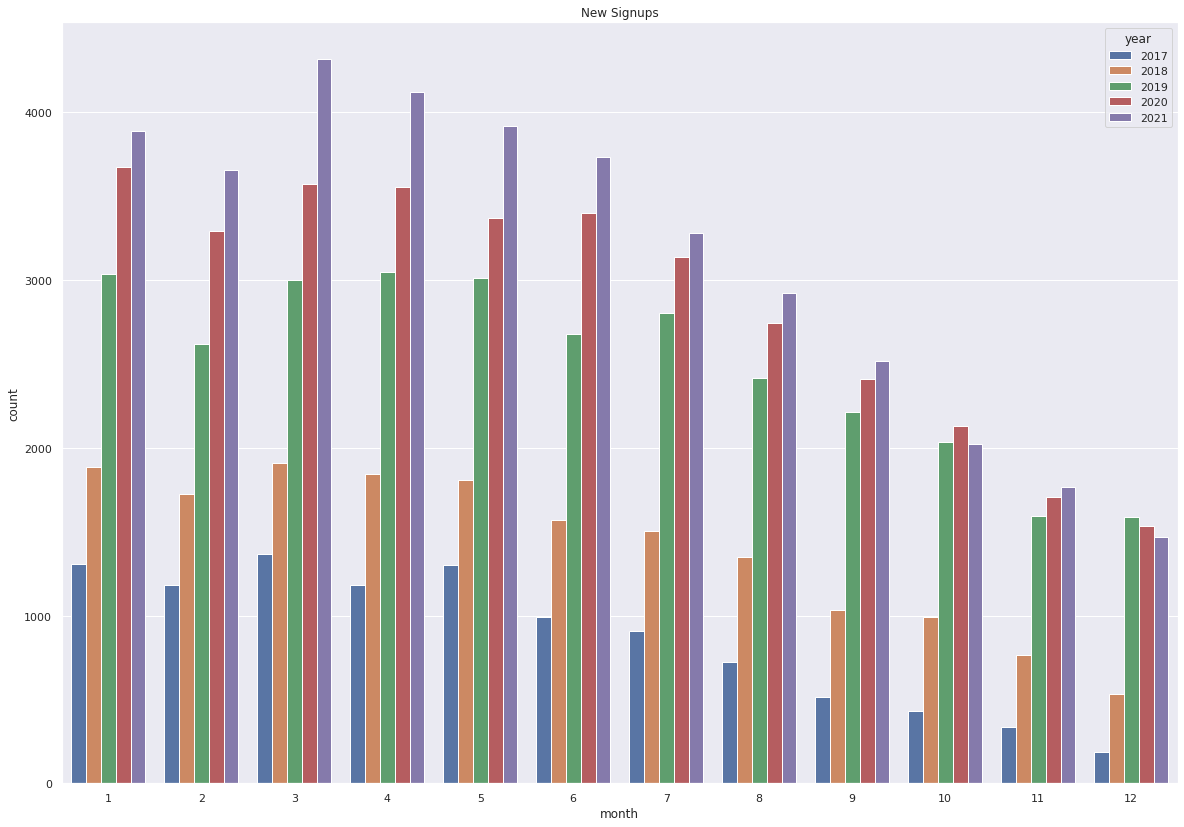

In [17]:
p = sns.countplot(x='month', data=cust_case[cust_case['reason'] == 'signup'], hue='year')
p.set_title('New Signups')

The company acquired more and more new customers every year
There were more new customers in the first half of the year than the second half of the year

Text(0.5, 1.0, 'Female Monthly User Age Distribution')

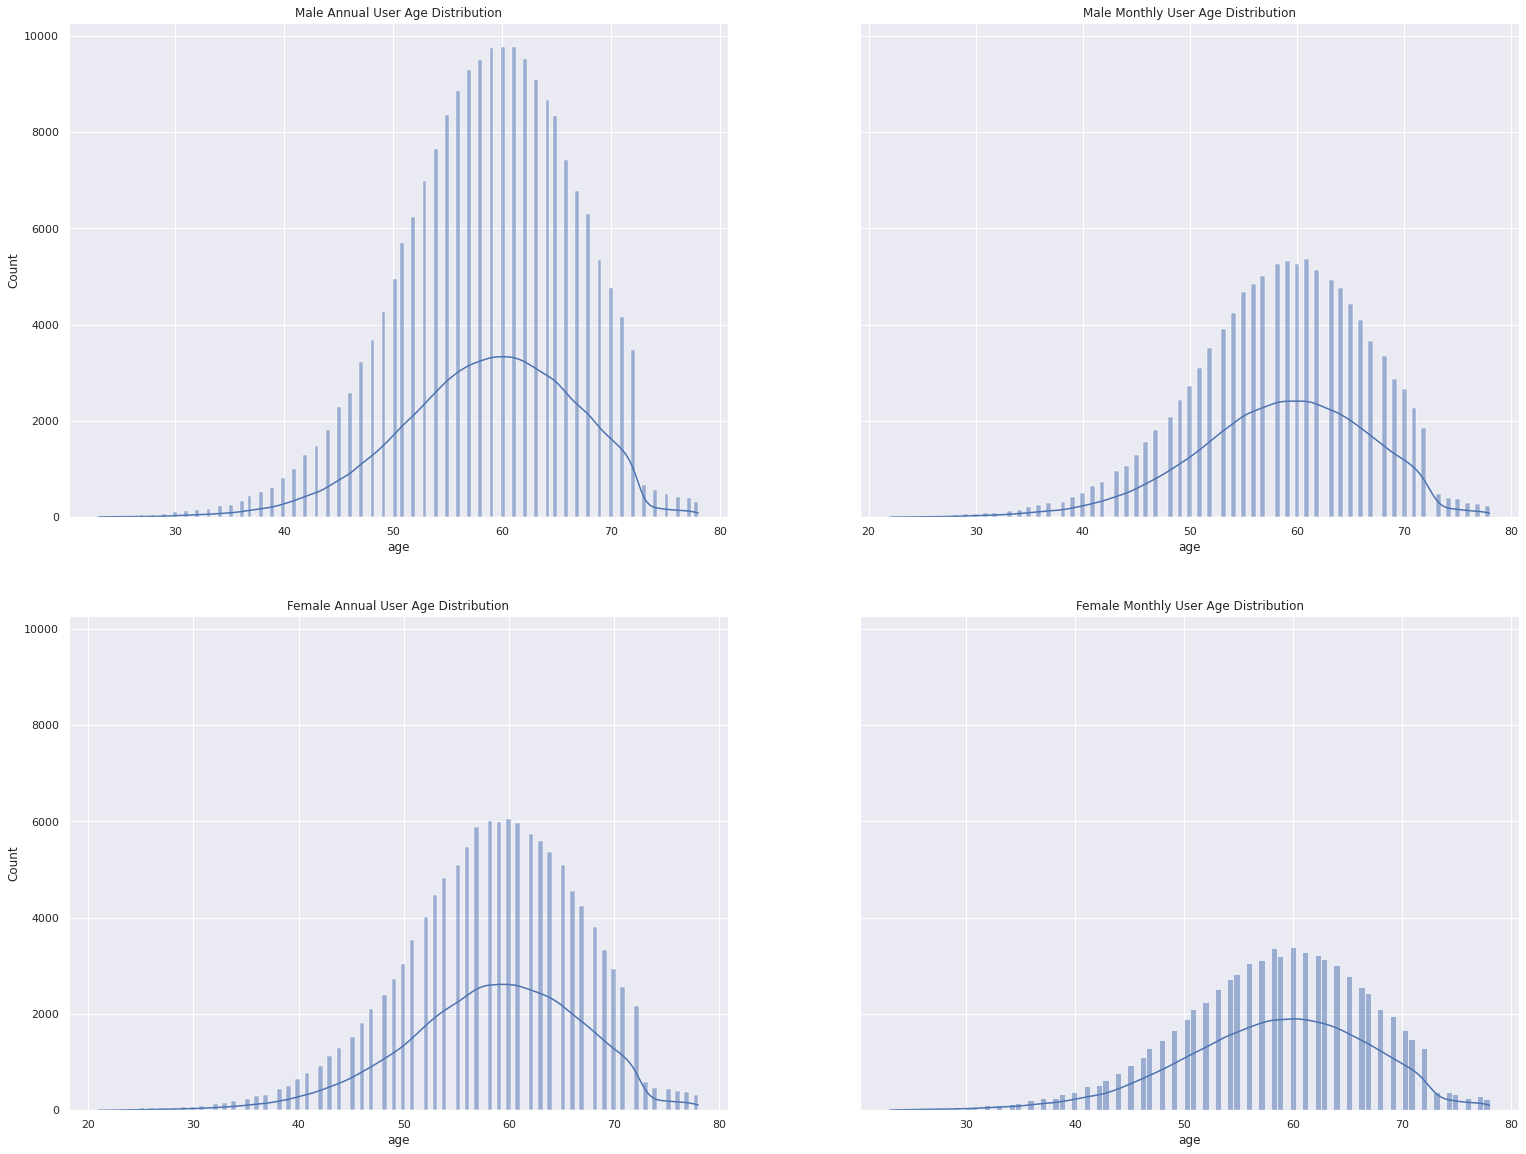

In [18]:
cust_prod_info = pd.merge(cust_info, cust_prod, on=['customer_id'])
fig, axs = plt.subplots(2, 2, sharey=True, figsize=(26, 20))
p1 = sns.histplot(data=cust_info[(cust_prod_info['gender']=='male')&(cust_prod_info['product']=='prd_1')], x='age', kde=True, ax=axs[0][0])
p2 = sns.histplot(data=cust_info[(cust_prod_info['gender']=='male')&(cust_prod_info['product']=='prd_2')], x='age', kde=True, ax=axs[0][1])
p3 = sns.histplot(data=cust_info[(cust_prod_info['gender']=='female')&(cust_prod_info['product']=='prd_1')], x='age', kde=True, ax=axs[1][0])
p4 = sns.histplot(data=cust_info[(cust_prod_info['gender']=='female')&(cust_prod_info['product']=='prd_2')], x='age', kde=True, ax=axs[1][1])
p1.set_title('Male Annual User Age Distribution')
p2.set_title('Male Monthly User Age Distribution')
p3.set_title('Female Annual User Age Distribution')
p4.set_title('Female Monthly User Age Distribution')

Our target user group would be age of 50-70

Text(0.5, 1.0, 'Monthly Subscription Duration Distribution')

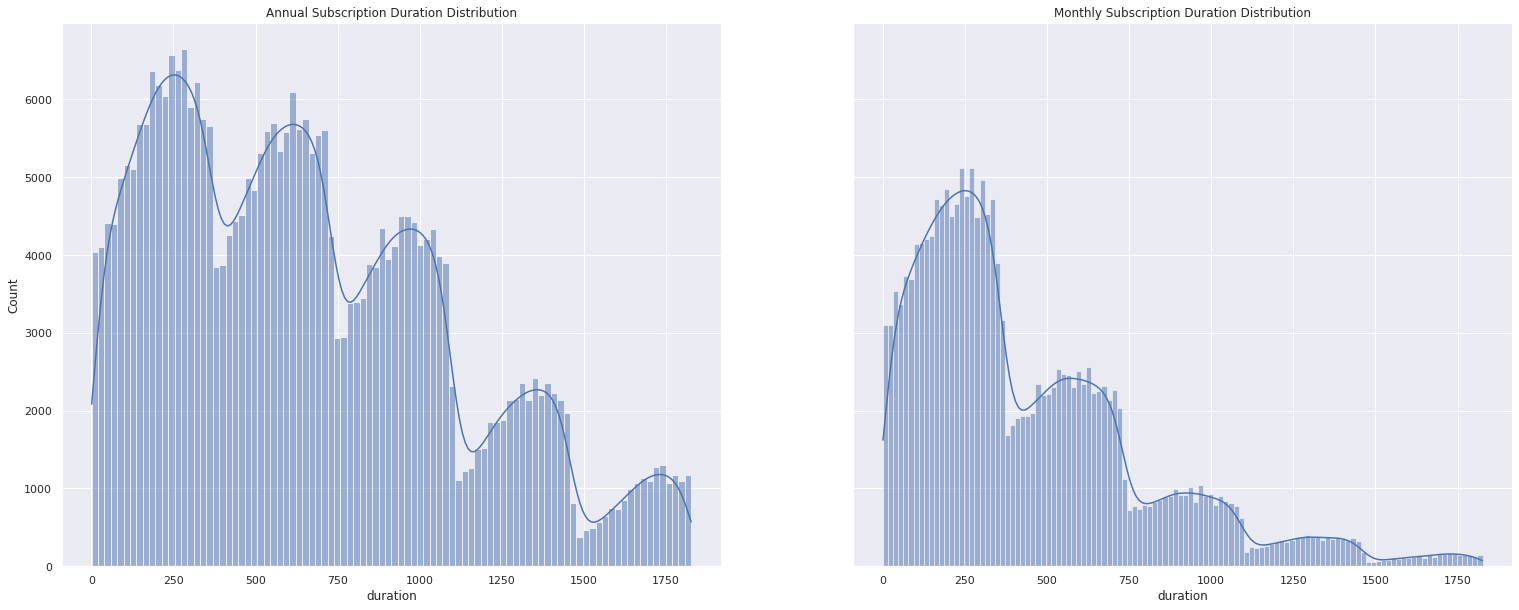

In [19]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(26, 10))
p1 = sns.histplot(data=cust_prod[cust_prod['product']=='prd_1'], x='duration', kde=True, ax=axs[0])
p2 = sns.histplot(data=cust_prod[cust_prod['product']=='prd_2'], x='duration', kde=True, ax=axs[1])
p1.set_title('Annual Subscription Duration Distribution')
p2.set_title('Monthly Subscription Duration Distribution')

Most annual sub users would stay for less than three years and end subscription right after the billing cycle
Most monthly sub users would stay for less than one year

## Signup Rate, Cancel_rate, Subscription Rate ##

In [20]:
# Create a new dataframe to calculate new customer rate
unique_cust_case_year_month = cust_case.drop_duplicates(subset=['customer_id', 'year', 'month'], keep='first')
cust_sub = pd.merge(unique_cust_case_year_month, cust_prod, on=['customer_id'])
cust_sub

,case_id,customer_id,channel,reason,date,year,month,product,signup_date,cancel_date,signup_year,signup_month,cancel_year,cancel_month,duration
0,CC101,C2448,phone,signup,2017-01-01,2017,1,prd_1,2017-01-01,2022-01-01,2017,1,2022,1,1826
1,CC102,C2449,phone,signup,2017-01-01,2017,1,prd_1,2017-01-01,2021-09-05,2017,1,2021,9,1708
2,CC103,C2450,phone,signup,2017-01-01,2017,1,prd_1,2017-01-01,2019-01-13,2017,1,2019,1,742
3,CC104,C2451,phone,signup,2017-01-01,2017,1,prd_2,2017-01-01,2022-01-01,2017,1,2022,1,1826
4,CC4491,C2451,phone,support,2017-03-31,2017,3,prd_2,2017-01-01,2022-01-01,2017,1,2022,1,1826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324585,CC330604,C484812,email,support,2021-12-31,2021,12,prd_2,2021-09-07,2022-01-01,2021,9,2022,1,116
324586,CC330608,C173079,email,support,2021-12-31,2021,12,prd_1,2018-05-22,2022-01-01,2018,5,2022,1,1320
324587,CC330609,C497581,email,support,2021-12-31,2021,12,prd_2,2021-10-25,2022-01-01,2021,10,2022,1,68
324588,CC330611,C497538,email,support,2021-12-31,2021,12,prd_2,2021-10-25,2022-01-01,2021,10,2022,1,68


In [21]:
signup_df= cust_sub[cust_sub['reason']=='signup'].groupby(['year', 'month']).size().reset_index(name='signup')
signup_df

,year,month,signup
0,2017,1,1306
1,2017,2,1183
2,2017,3,1367
3,2017,4,1182
4,2017,5,1299
5,2017,6,990
6,2017,7,909
7,2017,8,721
8,2017,9,513
9,2017,10,431


In [22]:
cust_cancel_df = cust_sub[cust_sub['cancel_year']!=2022].groupby(['cancel_year', 'cancel_month']).size().reset_index(name='cust_cancel')
cust_cancel_df

,cancel_year,cancel_month,cust_cancel
0,2017,1,13
1,2017,2,20
2,2017,3,62
3,2017,4,75
4,2017,5,115
5,2017,6,119
6,2017,7,152
7,2017,8,153
8,2017,9,146
9,2017,10,192


In [23]:
year = np.array([2017, 2018, 2019, 2020, 2021])
month = np.arange(1, 13)
total_sub = np.zeros((60,4))
idx=0

for y in year:
    for m in month:
        total_sub[idx][0] = y
        total_sub[idx][1] = m
        if m == 12:
            total_sub[idx][2] = cust_sub[(cust_sub['signup_date']<dt(y+1,1,1))&(cust_sub['cancel_date']>=dt(y,m,1))&(cust_sub['signup_month']==m)&(cust_sub['product']=='prd_1')].count().tolist()[0]
            total_sub[idx][3] = cust_sub[(cust_sub['signup_date']<dt(y+1,1,1))&(cust_sub['cancel_date']>=dt(y,m,1))&(cust_sub['product']=='prd_2')].count().tolist()[0]
        else:
            total_sub[idx][2] = cust_sub[(cust_sub['signup_date']<dt(y,m+1,1))&(cust_sub['cancel_date']>=dt(y,m,1))&(cust_sub['signup_month']==m)&(cust_sub['product']=='prd_1')].count().tolist()[0]
            total_sub[idx][3] = cust_sub[(cust_sub['signup_date']<dt(y,m+1,1))&(cust_sub['cancel_date']>=dt(y,m,1))&(cust_sub['product']=='prd_2')].count().tolist()[0]
        idx+=1
total_sub_df = pd.DataFrame(total_sub, columns=['sub_year','sub_month','prod_1_sub','prod_2_sub'], dtype='int64')
total_sub_df

,sub_year,sub_month,prod_1_sub,prod_2_sub
0,2017,1,2285,630
1,2017,2,2078,1164
2,2017,3,2388,1825
3,2017,4,2109,2427
4,2017,5,2237,3028
5,2017,6,1805,3471
6,2017,7,1582,3853
7,2017,8,1318,4173
8,2017,9,980,4354
9,2017,10,768,4541


In [24]:
unique_cust_case = cust_case.drop_duplicates(subset=['customer_id'], keep='first')
existing_cust = len(cust_prod[~cust_prod['customer_id'].isin(cust_case['customer_id'])])
total_cust_count = unique_cust_case[(unique_cust_case['year']==2017)&(unique_cust_case['month']==1)]['customer_id'].count()+existing_cust
total_cust = []

for y in year:
    for m in month:
        if y==2017 and m==1:
            total_cust.append(total_cust_count)
        else:
            total_cust_count = total_cust_count + signup_df[(signup_df['year']==y)&(signup_df['month']==m)]['signup'].tolist()[0] \
                               - cust_cancel_df[(cust_cancel_df['cancel_year']==y)&(cust_cancel_df['cancel_month']==m)]['cust_cancel'].tolist()[0]
            total_cust.append(total_cust_count)

In [25]:
cust_df = pd.merge(signup_df, cust_cancel_df, left_on=['year','month'], right_on=['cancel_year', 'cancel_month'])
cust_df = pd.merge(cust_df, total_sub_df, left_on=['year','month'], right_on=['sub_year', 'sub_month'])
cust_df['total_cust'] = total_cust

In [26]:
signup_rate = np.array(cust_df[1:]['signup']) / np.array(cust_df[:-1]['total_cust'])
signup_rate = np.insert(signup_rate, 0, 0)
cust_df['signup_rate'] = signup_rate.tolist()

cust_cancel_rate = np.array(cust_df[1:]['cust_cancel']) / np.array(cust_df[:-1]['total_cust'])
cust_cancel_rate = np.insert(cust_cancel_rate, 0, 0)
cust_df['cust_cancel_rate'] = cust_cancel_rate.tolist()

cust_df['annual_sub_revenue(million)'] = cust_df['prod_1_sub']*1200/1000000
cust_df['monthly_sub_revenue(million)'] = cust_df['prod_2_sub']*125/1000000
cust_df['annual_sub_rate'] = cust_df['prod_1_sub']/cust_df['total_cust']
cust_df['monthly_sub_rate'] = cust_df['prod_2_sub']/cust_df['total_cust']

cust_df.drop(columns=['cancel_year', 'cancel_month', 'sub_year', 'sub_month'], inplace=True)
cust_df

,year,month,signup,cust_cancel,prod_1_sub,prod_2_sub,total_cust,signup_rate,cust_cancel_rate,annual_sub_revenue(million),monthly_sub_revenue(million),annual_sub_rate,monthly_sub_rate
0,2017,1,1306,13,2285,630,251616,0.000000,0.000000,2.7420,0.078750,0.009081,0.002504
1,2017,2,1183,20,2078,1164,252779,0.004702,0.000079,2.4936,0.145500,0.008221,0.004605
2,2017,3,1367,62,2388,1825,254084,0.005408,0.000245,2.8656,0.228125,0.009398,0.007183
3,2017,4,1182,75,2109,2427,255191,0.004652,0.000295,2.5308,0.303375,0.008264,0.009511
4,2017,5,1299,115,2237,3028,256375,0.005090,0.000451,2.6844,0.378500,0.008725,0.011811
5,2017,6,990,119,1805,3471,257246,0.003862,0.000464,2.1660,0.433875,0.007017,0.013493
6,2017,7,909,152,1582,3853,258003,0.003534,0.000591,1.8984,0.481625,0.006132,0.014934
7,2017,8,721,153,1318,4173,258571,0.002795,0.000593,1.5816,0.521625,0.005097,0.016139
8,2017,9,513,146,980,4354,258938,0.001984,0.000565,1.1760,0.544250,0.003785,0.016815
9,2017,10,431,192,768,4541,259177,0.001664,0.000741,0.9216,0.567625,0.002963,0.017521


Text(0.5, 1.0, 'New Signup Rate')

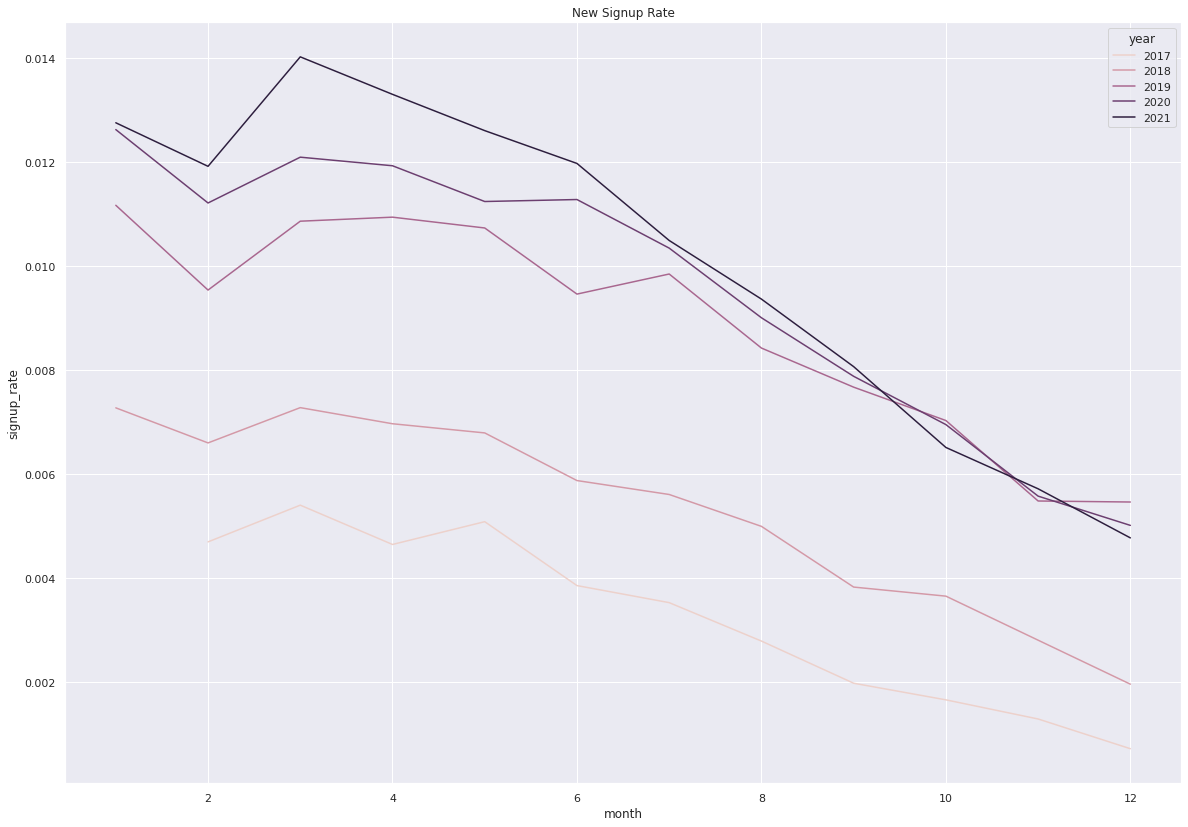

In [27]:
p = sns.lineplot(x='month', y='signup_rate', data=cust_df[1:], hue='year')
p.set_title('New Signup Rate')

Relatively high signup rates in the first half of years and keep going down in the remaining months

Overall signup rate goes up every year

Text(0.5, 1.0, 'Subscription Cancel Rate')

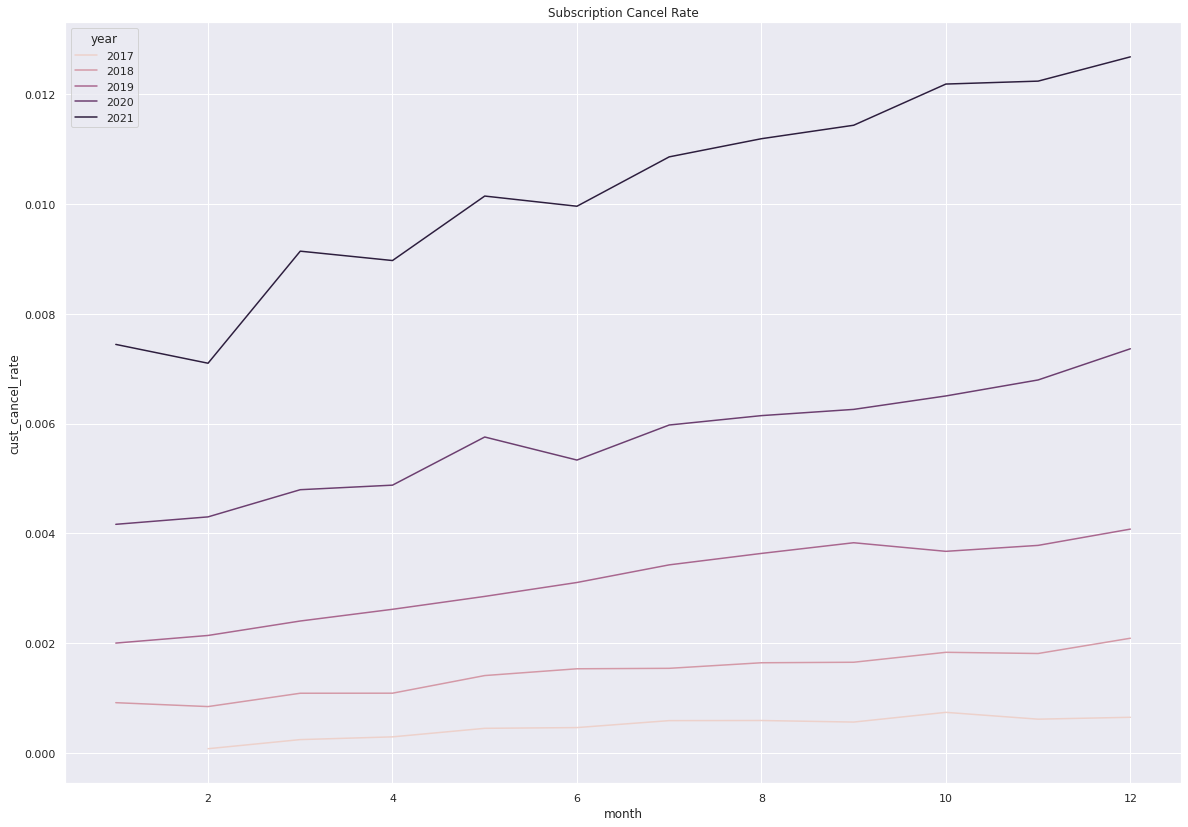

In [28]:
p = sns.lineplot(x='month', y='cust_cancel_rate', data=cust_df[1:], hue='year')
p.set_title('Subscription Cancel Rate')

Stable cancel rate for the first three years

A slight increase in year 2020 from 6% to almost 10%

A significant increase in year 2021 from 10% to more than 25%

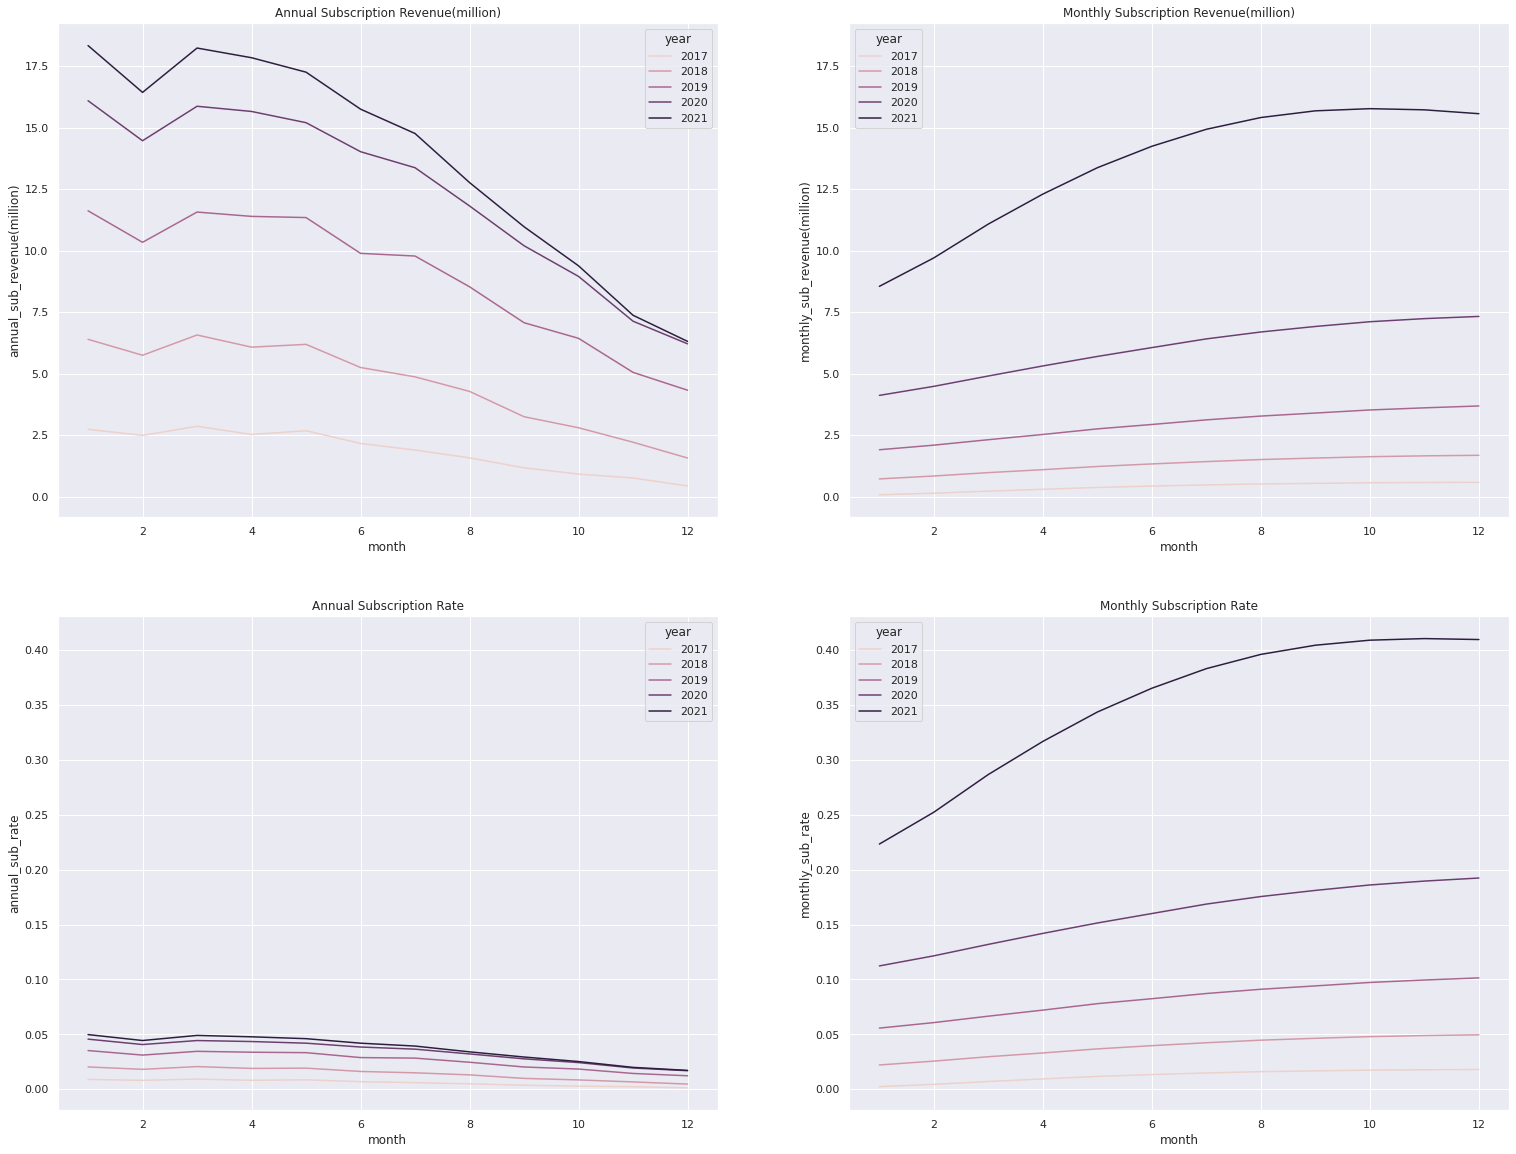

In [29]:
fig,  axs = plt.subplots(2, 2, figsize=(26,20))

p1 = sns.lineplot(x='month', y='annual_sub_revenue(million)', data=cust_df, hue='year', ax=axs[0][0])
p2 = sns.lineplot(x='month', y='monthly_sub_revenue(million)', data=cust_df, hue='year', ax=axs[0][1])
p3 = sns.lineplot(x='month', y='annual_sub_rate', data=cust_df, hue='year', ax=axs[1][0])
p4 = sns.lineplot(x='month', y='monthly_sub_rate', data=cust_df, hue='year', ax=axs[1][1])
p1.set_title('Annual Subscription Revenue(million)')
p2.set_title('Monthly Subscription Revenue(million)')
p3.set_title('Annual Subscription Rate')
p4.set_title('Monthly Subscription Rate')
axs[0][0].sharey(axs[0][1])
axs[1][0].sharey(axs[1][1])

More annual sub users pay their bills at the beginning of the year, whereas more monthly sub users tend to pay their bill at the end of the year

## Time Series Analysis ##

In [30]:
annual_sub = pd.to_datetime(cust_df['year'].astype(str) + '-' + cust_df['month'].astype(str))
annual_sub_df = pd.concat([annual_sub,cust_df['annual_sub_revenue(million)']], axis=1).rename(columns={0:'month'},errors='raise')
annual_sub_df.index=annual_sub_df['month']
annual_sub_df.drop(columns=['month'], inplace=True)

In [31]:
annual_sub_df

,annual_sub_revenue(million)
month,
2017-01-01,2.7420
2017-02-01,2.4936
2017-03-01,2.8656
2017-04-01,2.5308
2017-05-01,2.6844
2017-06-01,2.1660
2017-07-01,1.8984
2017-08-01,1.5816
2017-09-01,1.1760


In [32]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=2)
train_split, test_split = tss.split(annual_sub_df)
train_data = annual_sub_df.iloc[train_split[1], :]
test_data = annual_sub_df.iloc[test_split[1], :]

In [33]:
train_data

,annual_sub_revenue(million)
month,
2018-09-01,3.2532
2018-10-01,2.8044
2018-11-01,2.2164
2018-12-01,1.5744
2019-01-01,11.6232
2019-02-01,10.3428
2019-03-01,11.5716
2019-04-01,11.3964
2019-05-01,11.3484


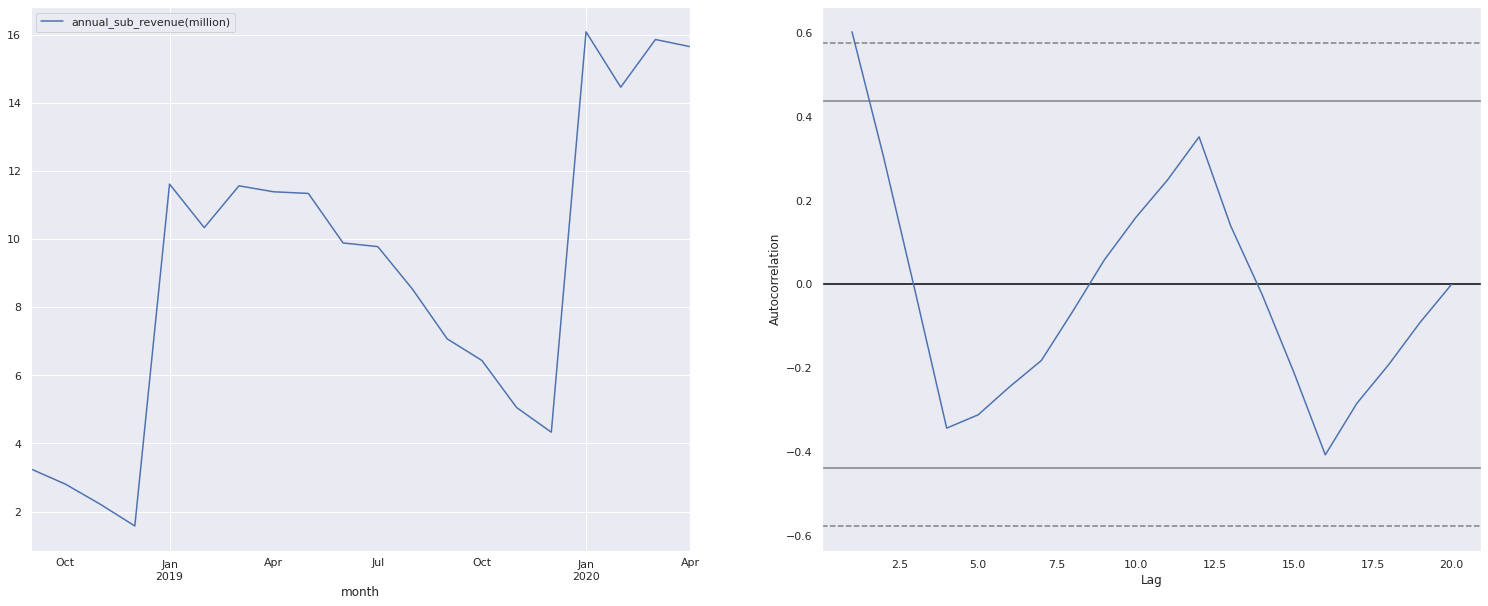

In [34]:
axs = plt.subplots(1, 2, figsize=(26, 10))[1]
_ = train_data.plot(ax=axs[0])
_ = pd.plotting.autocorrelation_plot(train_data, ax=axs[1])

The plot shows a trend of going up every year, and correlation barely goes near the line 0

This indicates the data is not stationary

In [35]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_data)
print('ADF Test Statistic: %.4f' % result[0])
print('5%% Critical Value: %.4f' % result[4]['5%'])
print('p-value: %.4f' % result[1])

ADF Test Statistic: -1.7761
5% Critical Value: -3.1894
p-value: 0.3924


abs(ADF) < abs(Critical Value) and p-value > 0.05 also show that the data is non-stationary

## Convert Non-stationary Data to Stationary Data ##

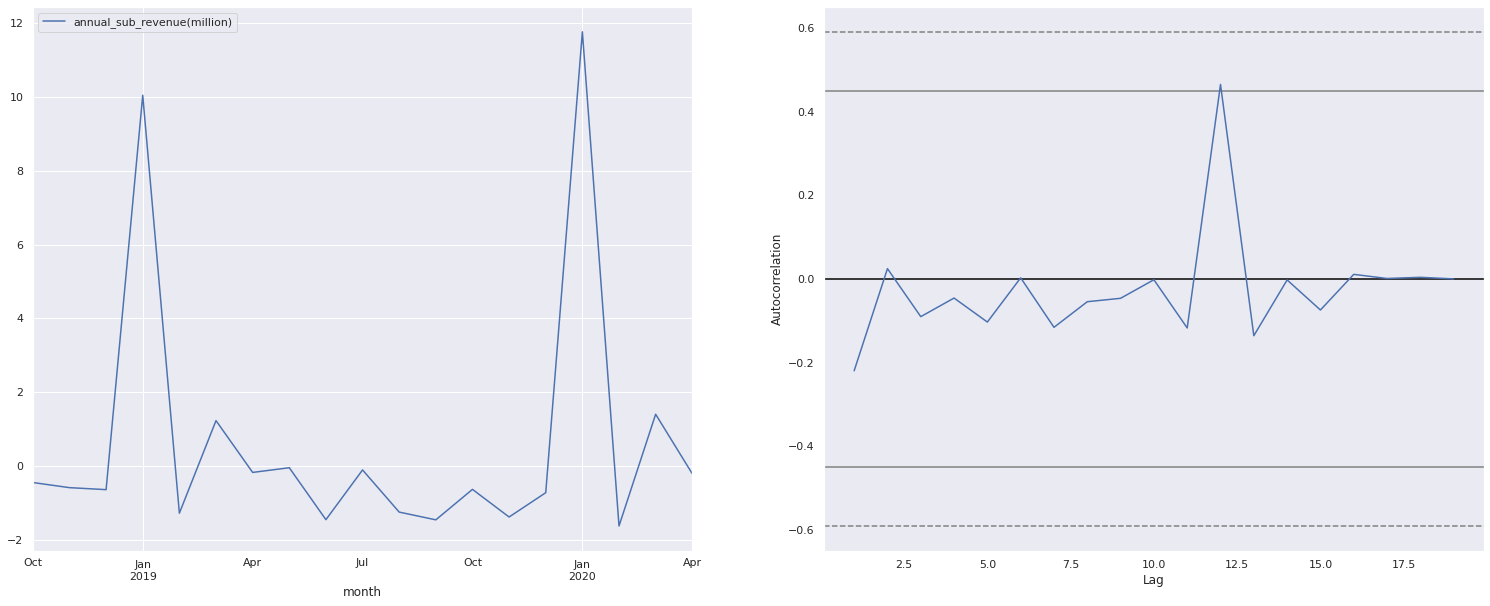

In [36]:
axs = plt.subplots(1, 2, figsize=(26, 10))[1]
_ = train_data.diff().dropna().plot(ax=axs[0])
_ = pd.plotting.autocorrelation_plot(train_data.diff().dropna(), ax=axs[1])

In [37]:
result = adfuller(train_data.diff().dropna())
print('ADF Test Statistic: %.4f' % result[0])
print('5%% Critical Value: %.4f' % result[4]['5%'])
print('p-value: %.4f' % result[1])

ADF Test Statistic: -5.0112
5% Critical Value: -3.0420
p-value: 0.0000


The difference of revenue between adjacent months is stationary

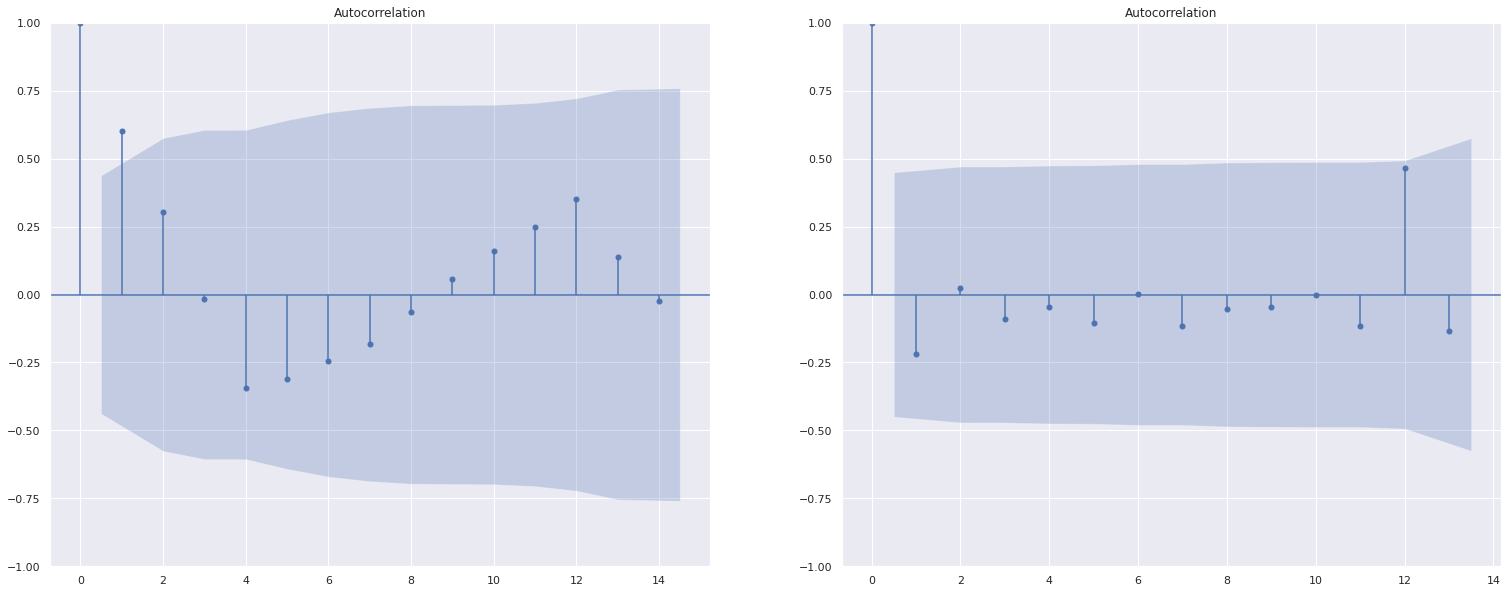

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

axs = plt.subplots(1,2,figsize=(26, 10))[1]
plot_acf(train_data, ax=axs[0]);
plot_acf(train_data.diff().dropna(), ax=axs[1]);

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


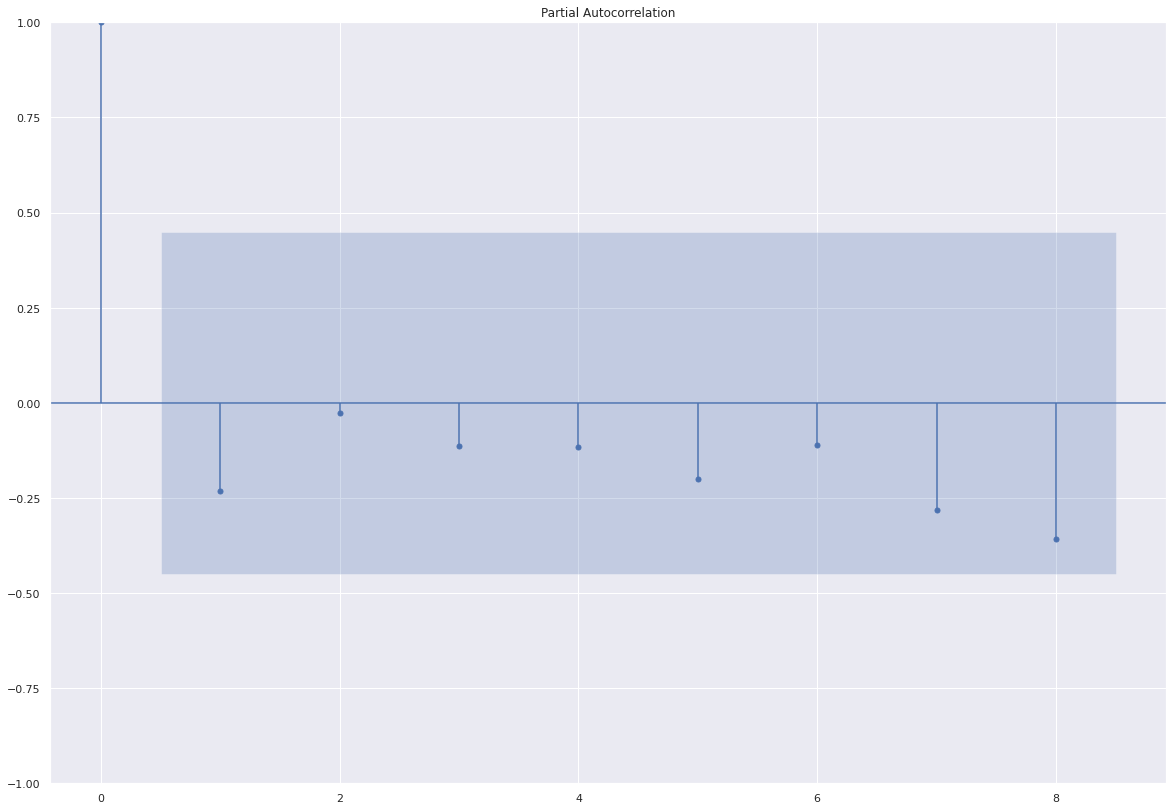

In [39]:
plot_pacf(train_data.diff().dropna(), lags=8);

In [40]:
from statsmodels.tsa.arima.model import ARIMA
from pprint import pprint

arima_model = ARIMA(train_data, order=(1, 1, 0))
model = arima_model.fit()
pprint(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
Dep. Variable:     annual_sub_revenue(million)   No. Observations:                   20
Model:                          ARIMA(1, 1, 0)   Log Likelihood                 -51.410
Date:                         Tue, 15 Nov 2022   AIC                            106.820
Time:                                 11:07:15   BIC                            108.709
Sample:                             09-01-2018   HQIC                           107.140
                                  - 04-01-2020                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1692      2.013     -0.084      0.933      -4.115       3.777
sigma2     

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Trying to find the combination of ARIMA(p, d, q) that gives the lowest AIC or BIC

d must be 1 since the difference of original data is stationary but the original data is not stationary

In [41]:
prediction = model.predict(dynamic=False)

In [42]:
Mape = np.mean(np.abs(np.array(prediction) - np.array(train_data).flatten())/np.abs(np.array(train_data).flatten()))
1-Mape

0.7516424765740138

According to MAPE score, our model has 75% accuracy on predicting the annual subs revenue, which is not a very ideal number

If more data is provided for training, the model might be able to predict better